In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report, accuracy_score

In [2]:
plt.rcParams['figure.figsize']=(25, 8)

In [3]:
data_read = pd.read_csv('course_project_train.csv')
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [4]:
def renams(data):
    name_columns = {'Home Ownership': 'домовладение', 'Annual Income': 'годовой доход', 'Years in current job': 'количество лет на текущем месте работы',
            'Maximum Open Credit': 'наибольший открытый кредит', 'Number of Credit Problems': 'количество проблем с кредитом',
            'Months since last delinquent': 'количество месяцев с последней просрочки платежа', 'Bankruptcies': 'банкротства',
            'Purpose': 'цель кредита', 'Term': 'срок кредита', 'Current Loan Amount': 'текущая сумма кредита',
            'Current Credit Balance': 'текущий кредитный баланс', 'Monthly Debt': 'ежемесячный долг', 'Credit Score': 'кредитный рейтинг',
            'Credit Default': '0 - погашен вовремя, 1 - просрочка', 'Tax Liens': 'налоговые льготы', 
           'Number of Open Accounts': 'количество открытых счетов', 'Years of Credit History': 'количество лет кредитной истории'}
    data.rename(columns=name_columns, inplace=True)
    return data

In [5]:
data_read = renams(data_read)

In [6]:
data_read['кредитный рейтинг'][data_read['кредитный рейтинг']> 1000] = 0

In [7]:
data_read[(data_read['текущая сумма кредита']>1000000)&(data_read['0 - погашен вовремя, 1 - просрочка']==1)]

,домовладение,годовой доход,количество лет на текущем месте работы,налоговые льготы,количество открытых счетов,количество лет кредитной истории,наибольший открытый кредит,количество проблем с кредитом,количество месяцев с последней просрочки платежа,банкротства,цель кредита,срок кредита,текущая сумма кредита,текущий кредитный баланс,ежемесячный долг,кредитный рейтинг,"0 - погашен вовремя, 1 - просрочка"


In [8]:
data_read

,домовладение,годовой доход,количество лет на текущем месте работы,налоговые льготы,количество открытых счетов,количество лет кредитной истории,наибольший открытый кредит,количество проблем с кредитом,количество месяцев с последней просрочки платежа,банкротства,цель кредита,срок кредита,текущая сумма кредита,текущий кредитный баланс,ежемесячный долг,кредитный рейтинг,"0 - погашен вовремя, 1 - просрочка"
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,0.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [9]:
data = data_read.drop('0 - погашен вовремя, 1 - просрочка', axis=1)
target = data_read['0 - погашен вовремя, 1 - просрочка']

### data, target 

### dummy переменные

In [10]:
def dummy(data, name):
    x = data[name].unique()
    for i in range(len(data[name].unique())):
        y = name+'_'+ str(i)
        data[y] = 3
        data[y][data[name]==x[i]] = 1
        data[y][data[name]!=x[i]] = 0
    data.drop(name, axis=1, inplace=True)
            
            
# dummy('домовладение')

### заполнение год доход и кредитный рейтинг

In [11]:
def god_dohod(data):
    data['годовой доход'].fillna(0, inplace=True)
    data['кредитный рейтинг'].fillna(0, inplace=True)
    data['банкротства'].fillna(0, inplace=True)
    data['количество месяцев с последней просрочки платежа'].fillna(0, inplace=True)
    return data

In [12]:
data = god_dohod(data)
dummy(data, 'домовладение')
dummy(data, 'количество лет на текущем месте работы')
dummy(data, 'цель кредита')
dummy(data, 'срок кредита')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   годовой доход                                     7500 non-null   float64
 1   налоговые льготы                                  7500 non-null   float64
 2   количество открытых счетов                        7500 non-null   float64
 3   количество лет кредитной истории                  7500 non-null   float64
 4   наибольший открытый кредит                        7500 non-null   float64
 5   количество проблем с кредитом                     7500 non-null   float64
 6   количество месяцев с последней просрочки платежа  7500 non-null   float64
 7   банкротства                                       7500 non-null   float64
 8   текущая сумма кредита                             7500 non-null   float64
 9   текущий кредитный б

### проба без обработки данных

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
from xgboost import XGBClassifier


[23:59:53] WARNING: ..\src\learner.cc:541: 
Parameters: { verbocity } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:59:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:54] WARNING: ..\src\learner.cc:541: 
Parameters: { verbocity } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:59:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluat

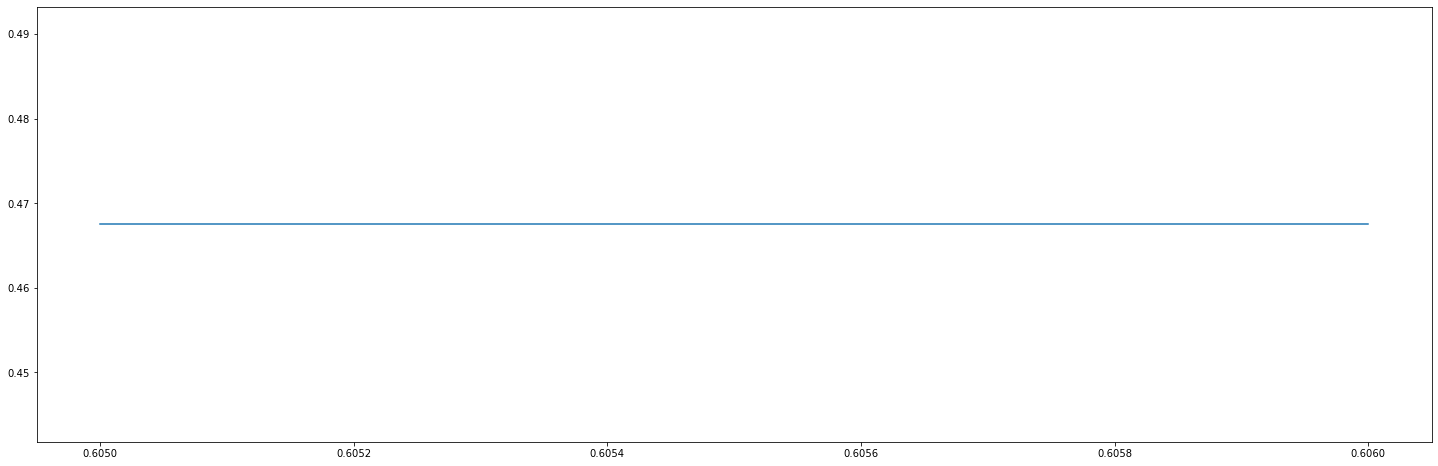

In [14]:
qwe = []
qw = []
q = (i/1000 for i in range(605, 607))
for i in q:
    xgb = XGBClassifier(eta=0.62, verbocity=0, max_depth=8, n_jobs=7)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
    qwe.append(i)
print(classification_report(y_test, y_pred))
plt.plot(qwe, qw)
plt.show()

In [15]:
f1_score(y_test, y_pred)

0.46750902527075816

### подготовка данных

<AxesSubplot:xlabel='годовой доход', ylabel='Density'>

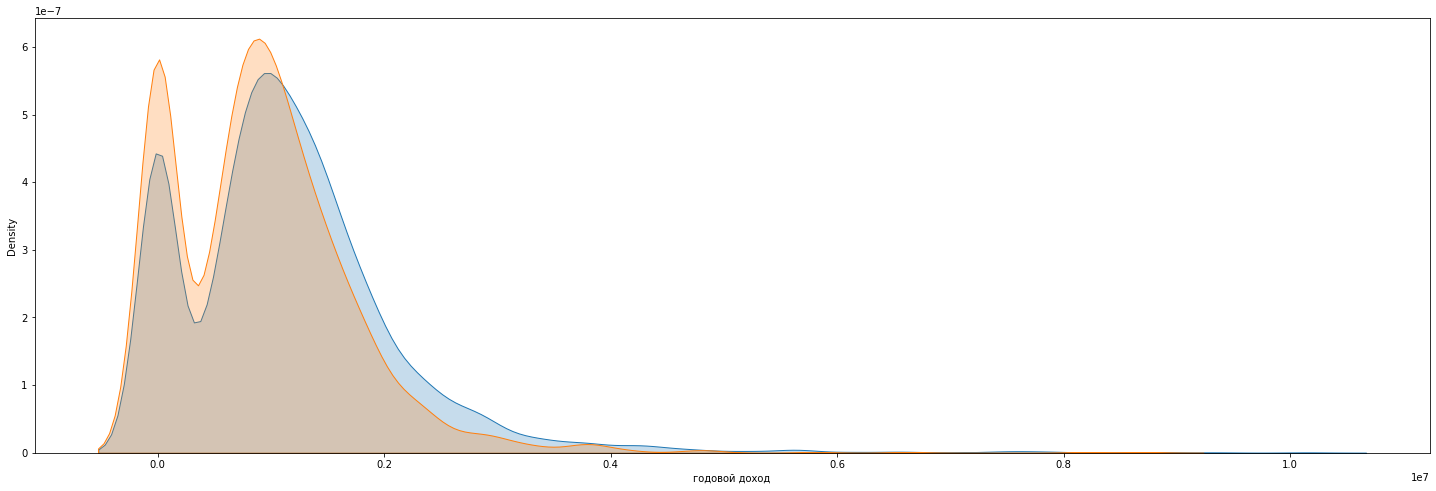

In [16]:
sns.kdeplot(data['годовой доход'][target == 0], shade=True)
sns.kdeplot(data['годовой доход'][target == 1], shade=True)

In [17]:
from scipy.stats import shapiro, ttest_ind, chi2, mannwhitneyu

In [18]:
del_data = []
good_data = []
for i in data.keys():
    if len(data[i].unique())>2:
        if shapiro(data[i]).pvalue > 0.05:
            print(i , 'норм' if ttest_ind(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else 'удаляем')
            good_data.append(i) if ttest_ind(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else del_data.append(i)
        elif shapiro(data[i]).pvalue < 0.05:
            print(i , 'норм' if mannwhitneyu(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else 'удаляем')
            good_data.append(i) if mannwhitneyu(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else del_data.append(i)
    

годовой доход норм
налоговые льготы норм
количество открытых счетов норм
количество лет кредитной истории норм
наибольший открытый кредит норм
количество проблем с кредитом удаляем
количество месяцев с последней просрочки платежа удаляем
банкротства удаляем
текущая сумма кредита норм
текущий кредитный баланс удаляем
ежемесячный долг норм
кредитный рейтинг норм


In [19]:
del_data, good_data

(['количество проблем с кредитом',
  'количество месяцев с последней просрочки платежа',
  'банкротства',
  'текущий кредитный баланс'],
 ['годовой доход',
  'налоговые льготы',
  'количество открытых счетов',
  'количество лет кредитной истории',
  'наибольший открытый кредит',
  'текущая сумма кредита',
  'ежемесячный долг',
  'кредитный рейтинг'])

In [20]:
# data.drop(del_data, axis=1, inplace=True)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(data, target)
y_pred_rfc = rfc.predict(data)

In [22]:
accuracy_score(target, y_pred_rfc)

1.0

<BarContainer object of 45 artists>

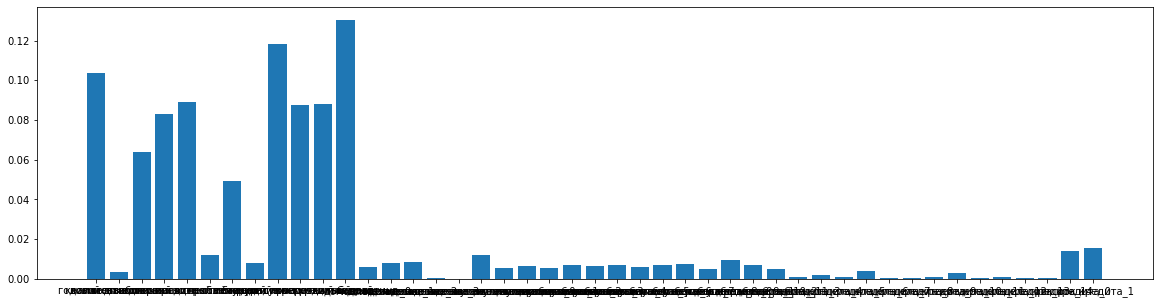

In [23]:
plt.figure(figsize=(20, 5))
plt.bar(data.keys(), rfc.feature_importances_)

In [24]:
rfc_importence = pd.DataFrame()
rfc_importence['w'] = rfc.feature_importances_
rfc_importence['key'] = data.keys()
rfc_importence

,w,key
0,0.103426,годовой доход
1,0.003315,налоговые льготы
2,0.063836,количество открытых счетов
3,0.082806,количество лет кредитной истории
4,0.089092,наибольший открытый кредит
5,0.011854,количество проблем с кредитом
6,0.049093,количество месяцев с последней просрочки платежа
7,0.007903,банкротства
8,0.118292,текущая сумма кредита
9,0.087772,текущий кредитный баланс


In [25]:
# data_2 = data.copy()
# data_2.drop(list(rfc_importence['key'][rfc_importence['w']<0.05]), axis=1, inplace=True)
# data_2
data.drop(list(rfc_importence['key'][rfc_importence['w']<0.014]), axis=1, inplace=True)

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1592
           1       0.79      0.29      0.43       658

    accuracy                           0.77      2250
   macro avg       0.78      0.63      0.64      2250
weighted avg       0.77      0.77      0.73      2250



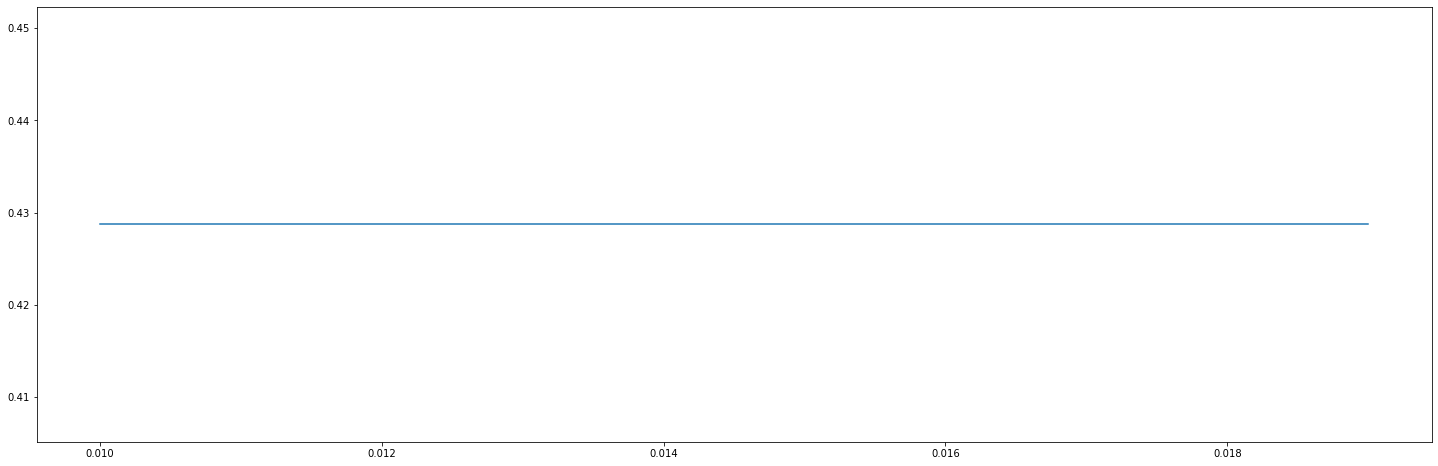

In [26]:

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
qw = []
q = [i/1000 for i in range(10, 20)]
for i in q:
#     data_1 = data.copy()
#     data_1.drop(list(rfc_importence['key'][rfc_importence['w']<i]), axis=1, inplace=True)
#     x_train, x_test, y_train, y_test = train_test_split(data_1, target, test_size=0.3, random_state=42)
    xgb = XGBClassifier(eta=0.01, max_depth=3, verbosity=0,  n_estimators=14, n_jobs=7, reg_alpha=0.001)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.plot(q, qw)
plt.show()

In [27]:
y_proba = xgb.predict_proba(x_test)
y_proba = pd.DataFrame(y_proba, columns=['1', '2'])
y_proba

,1,2
0,0.435308,0.564692
1,0.530380,0.469620
2,0.526204,0.473796
3,0.530380,0.469620
4,0.564803,0.435197
...,...,...
2245,0.535635,0.464365
2246,0.435308,0.564692
2247,0.535635,0.464365
2248,0.435308,0.564692


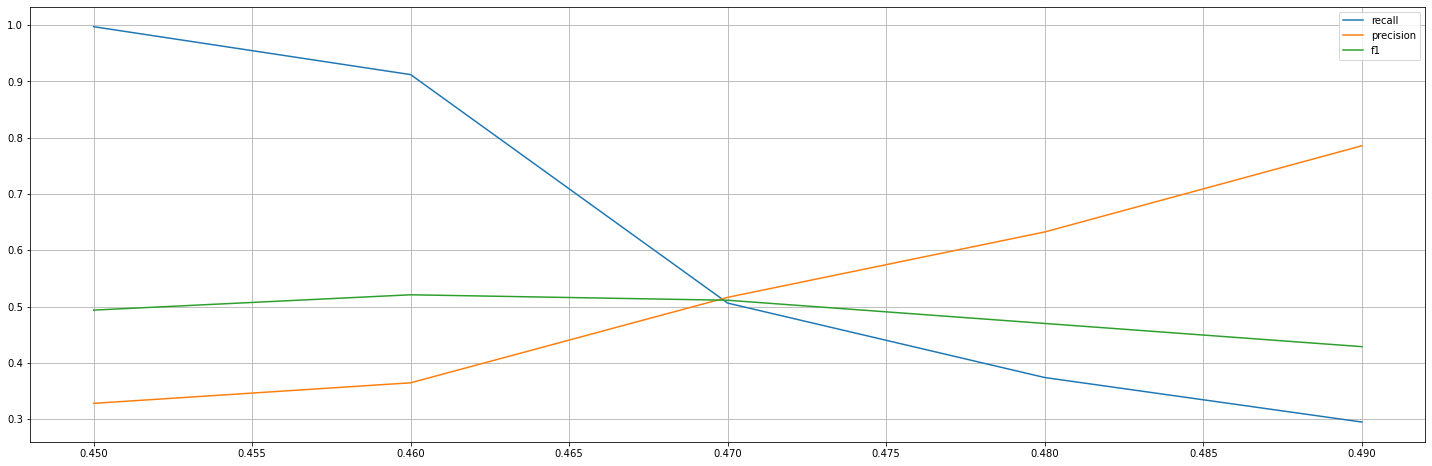

In [28]:
rec = []
pre = []
f11 = []
qw = []
q = (i/100 for i in range(45, 50))
for i in q:
    y_pred_proba = np.asarray([np.where(line>i, 1, 0) for line in y_proba['2']])
    rec.append(recall_score(y_test, y_pred_proba))
    pre.append(precision_score(y_test, y_pred_proba))
    f11.append(f1_score(y_test, y_pred_proba))
    qw.append(i)
y_pred_proba

plt.plot(qw, rec, label='recall')
plt.plot(qw, pre, label='precision')
plt.plot(qw, f11, label='f1')
plt.legend()
plt.grid()
plt.show()

In [29]:
y_pred_train = xgb.predict_proba(x_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['1', '2'])
y_pred_train_ = np.asarray([np.where(line>0.469, 1, 0) for line in y_pred_train['2']])
y_pred_proba = np.asarray([np.where(line>0.469, 1, 0) for line in y_proba['2']])
print(f1_score(y_test, y_pred_proba))
print(f1_score(y_train, y_pred_train_))
print(classification_report(y_test, y_pred_proba))

0.5297549591598599
0.529518855656697
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1592
           1       0.43      0.69      0.53       658

    accuracy                           0.64      2250
   macro avg       0.63      0.66      0.62      2250
weighted avg       0.71      0.64      0.66      2250



In [30]:
data

,годовой доход,количество открытых счетов,количество лет кредитной истории,наибольший открытый кредит,количество месяцев с последней просрочки платежа,текущая сумма кредита,текущий кредитный баланс,ежемесячный долг,кредитный рейтинг,срок кредита_0,срок кредита_1
0,482087.0,11.0,26.3,685960.0,0.0,99999999.0,47386.0,7914.0,749.0,1,0
1,1025487.0,15.0,15.3,1181730.0,0.0,264968.0,394972.0,18373.0,737.0,0,1
2,751412.0,11.0,35.0,1182434.0,0.0,99999999.0,308389.0,13651.0,742.0,1,0
3,805068.0,8.0,22.5,147400.0,0.0,121396.0,95855.0,11338.0,694.0,1,0
4,776264.0,13.0,13.6,385836.0,0.0,125840.0,93309.0,7180.0,719.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,3.0,8.5,107866.0,0.0,129360.0,73492.0,1900.0,697.0,1,0
7496,1533984.0,10.0,26.5,686312.0,43.0,444048.0,456399.0,12783.0,0.0,0,1
7497,1878910.0,12.0,32.1,1778920.0,0.0,99999999.0,477812.0,12479.0,748.0,1,0
7498,0.0,21.0,26.5,1141250.0,0.0,615274.0,476064.0,37118.0,0.0,1,0


### подбор гиперпараметров

In [31]:
# %time
# from sklearn.model_selection import GridSearchCV
# parametrs = { 'n_estimators': range(10, 30),
#               'max_depth': range(1,5),
#               'eta': [i/100 for i in range(1, 80, 5)],
#               'reg_alpha': [i/1000 for i in range(1, 100, 10)]}
# grid = GridSearchCV(xgb, parametrs, cv=3, verbose=10, refit=True)
# grid.fit(data, target)
# grid.best_params_

In [32]:
{'eta': 0.01, 'max_depth': 3, 'n_estimators': 14, 'reg_alpha': 0.001}

{'eta': 0.01, 'max_depth': 3, 'n_estimators': 14, 'reg_alpha': 0.001}

### гипотезы

In [33]:
# data['годовой доход'][data['годовой доход']==0] = data['годовой доход'].median()
# data['кредитный рейтинг'][data['кредитный рейтинг']==0] = data['кредитный рейтинг'].median()

In [34]:
# data['кредитный рейтинг'][data['кредитный рейтинг']>1000] = data['кредитный рейтинг']/10

### визуальная оценка данных

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
xgb = XGBClassifier(eta=0.62, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=7 )
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
f1_score(y_test, y_pred)


0.416382252559727

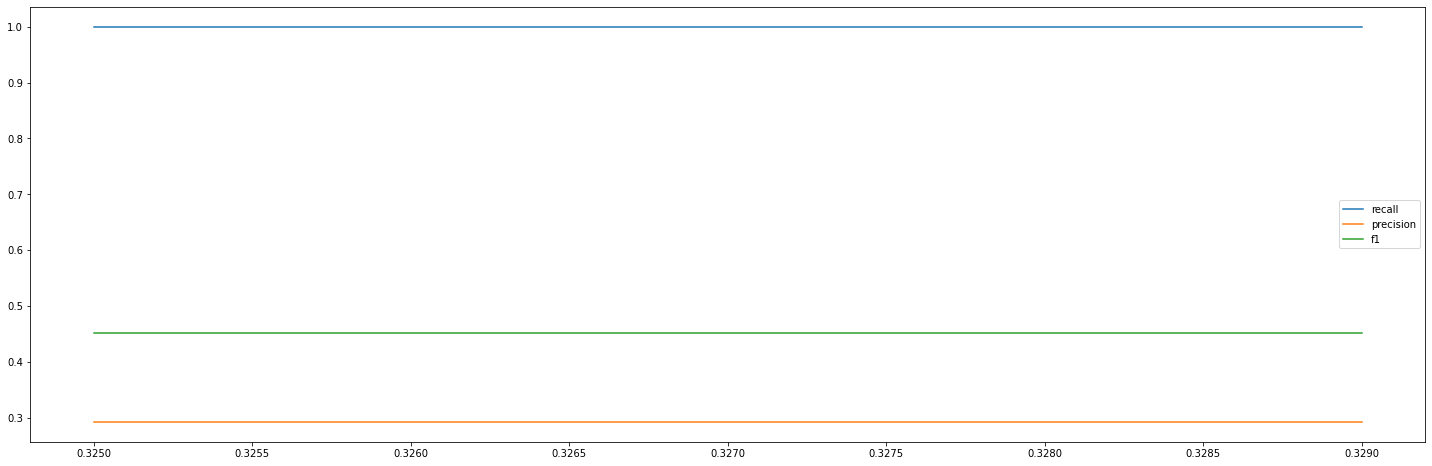

In [36]:
rec = []
pre = []
f11 = []
qw = []
q = (i/1000 for i in range(325, 330))
for i in q:
    y_pred_proba = np.asarray([np.where(line>i, 1, 0) for line in y_proba['2']])
    rec.append(recall_score(y_test, y_pred_proba))
    pre.append(precision_score(y_test, y_pred_proba))
    f11.append(f1_score(y_test, y_pred_proba))
    qw.append(i)
y_pred_proba

plt.plot(qw, rec, label='recall')
plt.plot(qw, pre, label='precision')
plt.plot(qw, f11, label='f1')
plt.legend()
plt.show()

In [45]:
y_pred_train = xgb.predict_proba(x_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['1', '2'])
y_pred_train_ = np.asarray([np.where(line>0.469, 1, 0) for line in y_pred_train['2']])
y_pred_proba = np.asarray([np.where(line>0.469, 1, 0) for line in y_proba['2']])
print(f1_score(y_test, y_pred_proba))
print(f1_score(y_train, y_pred_train_))
print(classification_report(y_test, y_pred_proba))

0.5297549591598599
0.524851918619624
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1592
           1       0.43      0.69      0.53       658

    accuracy                           0.64      2250
   macro avg       0.63      0.66      0.62      2250
weighted avg       0.71      0.64      0.66      2250



In [38]:
confusion_matrix(y_test, y_pred_proba), accuracy_score(y_test, y_pred_proba)

(array([[   0, 1592],
        [   0,  658]], dtype=int64),
 0.29244444444444445)

### окончательная модель

In [39]:
xgb = XGBClassifier(eta=0.01, max_depth=3, verbosity=0,  n_estimators=14, n_jobs=7, reg_alpha=0.001)
xgb.fit(data, target)
y_pred_train_ = np.asarray([np.where(line>0.469, 1, 0) for line in xgb.predict_proba(data)[:, 1]])
f1_score(target, y_pred_train_), accuracy_score(target, y_pred_train_)

(0.5259035072102545, 0.6449333333333334)

In [40]:
data_test = pd.read_csv('course_project_test.csv')
data_test = renams(data_test)
data_test = god_dohod(data_test)
# data_test.drop(del_data, axis=1, inplace=True)
data_test['кредитный рейтинг'][data_test['кредитный рейтинг']> 1000] = 0
dummy(data_test, 'домовладение')
dummy(data_test, 'количество лет на текущем месте работы')
dummy(data_test, 'цель кредита')
dummy(data_test, 'срок кредита')
data_test

,годовой доход,налоговые льготы,количество открытых счетов,количество лет кредитной истории,наибольший открытый кредит,количество проблем с кредитом,количество месяцев с последней просрочки платежа,банкротства,текущая сумма кредита,текущий кредитный баланс,...,цель кредита_6,цель кредита_7,цель кредита_8,цель кредита_9,цель кредита_10,цель кредита_11,цель кредита_12,цель кредита_13,срок кредита_0,срок кредита_1
0,0.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,162470.0,105906.0,...,0,0,0,0,0,0,0,0,1,0
1,231838.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,78298.0,46037.0,...,0,0,0,0,0,0,0,0,1,0
2,1152540.0,0.0,10.0,13.7,204600.0,0.0,0.0,0.0,200178.0,146490.0,...,0,0,0,0,0,0,0,0,1,0
3,1220313.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,217382.0,213199.0,...,0,0,0,0,0,0,0,0,1,0
4,2340952.0,0.0,11.0,23.6,1207272.0,0.0,0.0,0.0,777634.0,425391.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1020053.0,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,99999999.0,162735.0,...,0,0,0,0,0,0,0,0,1,0
2496,0.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,468512.0,1439269.0,...,0,0,0,0,0,0,0,0,1,0
2497,1171806.0,0.0,48.0,12.8,1706430.0,0.0,0.0,0.0,430496.0,676438.0,...,0,0,0,0,0,0,0,0,1,0
2498,723520.0,0.0,14.0,28.8,945780.0,0.0,0.0,0.0,257774.0,391248.0,...,0,0,0,0,0,0,0,0,1,0


In [41]:

data_test['цель кредита_14'] = 0
data_test.drop(list(rfc_importence['key'][rfc_importence['w']<0.014]), axis=1, inplace=True)

In [42]:
print(data_test.keys(), len(data_test.keys()))
print(data.keys(), len(data.keys()))

Index(['годовой доход', 'количество открытых счетов',
       'количество лет кредитной истории', 'наибольший открытый кредит',
       'количество месяцев с последней просрочки платежа',
       'текущая сумма кредита', 'текущий кредитный баланс', 'ежемесячный долг',
       'кредитный рейтинг', 'срок кредита_0', 'срок кредита_1'],
      dtype='object') 11
Index(['годовой доход', 'количество открытых счетов',
       'количество лет кредитной истории', 'наибольший открытый кредит',
       'количество месяцев с последней просрочки платежа',
       'текущая сумма кредита', 'текущий кредитный баланс', 'ежемесячный долг',
       'кредитный рейтинг', 'срок кредита_0', 'срок кредита_1'],
      dtype='object') 11


In [43]:
y_pred_test_data = pd.DataFrame(data_test.index, columns=['id'])
y_pred_test_data['Credit Default'] = np.asarray([np.where(line>0.469, 1, 0) for line in xgb.predict_proba(data_test)[:, 1]])
y_pred_test_data

,id,Credit Default
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
2495,2495,0
2496,2496,1
2497,2497,1
2498,2498,0


In [44]:
y_pred_test_data.to_csv('PMakov_predictions.csv', index=False)
x = pd.read_csv('PMakov_predictions.csv')
x

,id,Credit Default
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
2495,2495,0
2496,2496,1
2497,2497,1
2498,2498,0
